## Final Project Submission

Please fill out:
* Student name: DANIEL AKAMA
* Student pace: full time
* Scheduled project review date/time: 12/03/2023
* Instructor name: MR.WILLIAM OKOMBA
* Blog post URL: N/A


# Phase 1 project
### Author: DANIEL AKAMA

#### Project motto: "simple is better than complex!"

# Overview

This is an end of phase project i.e. phase 1. The business problem is aiding the company Microsoft to decide on the films to create. The task was simple: explore what types of films are currently doing the best at the box office. IMDB and BOM.MOVIE_GROSS are the datasets used.
CRISP-DM is the methodology implemented, and three recommendations on the type of films to create, the studios to partner with and the length of films to create are made.

# i) Business Problem

* Microsoft has setup a movie studio but dont know anything about creating movies. The problem is key to this project as the project seeks to aid them on how to go about some of the details.
* The data analysis questions were picked after examining both datasets i.e data preparation. They are chosen because they give distinct answers on what and who to engage with. 

# ii) Data Understanding

* The datasets used in this analysis were obtained from IMDB sites and BOM MOVIES. They are key since they help to debunk which genres are the best based on their average rating, the average runtime of a film to create and the studios to partner with.


### Importing needed libraries and loading data 

In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
# importing the needed libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading the datasets

# SQL DATABASE
sql_connection = sqlite3.connect('sql.db')
movies_database = pd.read_sql("""SELECT name FROM
sqlite_master WHERE type='table';""", sql_connection)

# CSV FILE
movies_gross_df = pd.read_csv('bom.movie_gross.csv.gz', delimiter=',')


In [4]:
# now we select the relevant tables and join them to one dataframe.

joined_sql_tables = pd.read_sql("""SELECT * from movie_basics
join movie_ratings using (movie_id);""", sql_connection)

# lets database view how the data looks like.
joined_sql_tables.head(3)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


# iii) Data Preparation

* In this section, both datasets were examined and issues that were evident were dealt with.
* Preparation starts with the CSV dataset then the SQL database.
* Missing values were dropped and others were replaced with appropriate values, duplicates were handled and outliers were cut from the datasets.
* The methods described above were used because without, incorrect results would be seen.

### 1. CSV FILE

In [5]:
# lets veiw the movie dataframe
movies_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
# summary info
movies_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### dealing with mising values in CSV file

In [7]:
# count and percentage of missing values
missing_values = movies_gross_df.isna().sum()
missing_values_percentage = (missing_values/len(movies_gross_df)) * 100
missing_dataframe = {'missing_values_count':missing_values.values, 'percentage_missing':missing_values_percentage}
view = pd.DataFrame(missing_dataframe)
view

,missing_values_count,percentage_missing
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


In [8]:
# dropping missing values rows
movies_gross_df = movies_gross_df.dropna(axis=0)
movies_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


* Decision was to drop the rows with missing values because we could not guess 39% of values.
* "In the face of ambiguity, refuse the temptation to guess!"

#### checking and dealing with duplicated values for CSV file

In [9]:
# check for duplicates
print('The CSV dataset has {} duplicates'.format(movies_gross_df.duplicated().sum()))

The CSV dataset has 0 duplicates


0 duplicated values.

In [10]:
# checking to see if studios has anomalies.
movies_gross_df['studio'].value_counts()

Uni.            144
Fox             134
WB              130
Sony            105
BV              104
               ... 
AGF               1
Icar.             1
MPFT              1
KC                1
Darin Southa      1
Name: studio, Length: 172, dtype: int64

In [11]:
 # confirming our final dataset count
len(movies_gross_df)

2007

#### fixing structural errors in csv file


In [12]:
# lets remove the commas in foreign_gross column and convert to float

movies_gross_df['foreign_gross'] = movies_gross_df['foreign_gross'].str.replace(',','').astype(float)
movies_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


#### checking for outliers in the CSV file

In [13]:
# gives is summary stats and will show if the dataframe has outliers
movies_gross_df.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


#### visual outlier representation

[Text(0.5, 1.0, 'domestic gross outliers')]

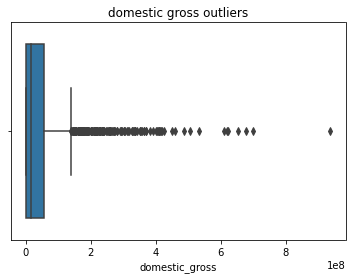

In [14]:
# boxplot to see outliers in domestic gross
import seaborn as sns
sns.boxplot(data=movies_gross_df, x='domestic_gross').set(title='domestic gross outliers')

[Text(0.5, 1.0, 'foreign gross outliers')]

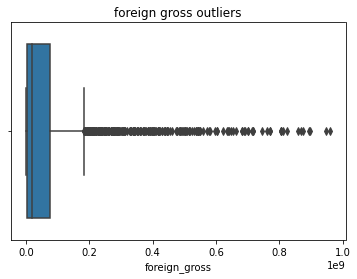

In [15]:
# boxplot to see outliers in foreign gross
sns.boxplot(data=movies_gross_df, x='foreign_gross').set(title='foreign gross outliers')


#### conclusion on outliers

* Due to the context of this project, the outliers were not removed as the analyst found them to be true outliers.
* The analyst felt they represented natural variations in the dataset, and that they should be left as is.
* They were not problematic since the task was exploring what films are doing the best in the box office.


## 2. SQL database

In [16]:
movies_database.head() # shows the tables in the database

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


In [17]:
# now we select the relevant tables and join them to one dataframe.

joined_sql_tables = pd.read_sql("""SELECT * from movie_basics
join movie_ratings using (movie_id);""", sql_connection)

joined_sql_tables.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [18]:
# lets see some basic info on this particular dataset
joined_sql_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


### checking and dealing with missing values in SQL dataframe

In [19]:
# count and percentage of missing values

missing_values_db = joined_sql_tables.isna().sum()
missing_values_db_percentage = (missing_values_db/len(joined_sql_tables)) * 100
missing_values_db_dataframe = {'missing_values_count':missing_values_db.values, 
                               'percentage_missing':missing_values_db_percentage}
view = pd.DataFrame(missing_values_db_dataframe)
view

,missing_values_count,percentage_missing
movie_id,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
runtime_minutes,7620,10.317374
genres,804,1.088605
averagerating,0,0.000000
numvotes,0,0.000000


In [20]:
joined_sql_tables.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


* It can clearly be seen that about 11% of the dataset consists of missing values.
* Decision is to drop the rows where genre is missing, reason being guessing GENRE would impact out overall decision.
* Replace the rows where runtime_minutes is missing with the median time.


### replacing with median time

In [21]:
# replacing with median time

joined_sql_tables['runtime_minutes'] = joined_sql_tables['runtime_minutes'].replace(np.nan, joined_sql_tables['runtime_minutes'].median())

In [22]:
joined_sql_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


### dropping rows with genre missing

In [23]:
# dropping rows where genre is missing since we cant guess genre.

joined_sql_tables = joined_sql_tables.dropna(axis=0)

In [24]:
joined_sql_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [25]:
# confirming length of dataframe
len(joined_sql_tables)

73052

* Missing values have been delt with. 1% of the values were dropped.
* rows with Runtime minutes missing was replace with median time.
* rows with genres missing were dropped.

### check and deal with duplicates in sql database

In [26]:
print('The SQL dataset has {} duplicates.'.format(joined_sql_tables.duplicated().sum())) # counting number of duplicates

The SQL dataset has 0 duplicates.


In [27]:
# checking to see the distribution of studios.
joined_sql_tables['genres'].value_counts()

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

### checking if any structural issues


In [28]:
joined_sql_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


"""
    - The SQL dataset lacks any structural issues.
    - All the columns are of the right type
"""

### checking and dealing with outliers

In [29]:
# checking to see the distribution of studios.
joined_sql_tables.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73052.000000,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,94.357677,6.330930,3.562173e+03
std,2.615288,198.595006,1.474699,3.045804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,5.000000e+01
75%,2017.000000,102.000000,7.400000,2.890000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


[Text(0.5, 1.0, 'Outliers')]

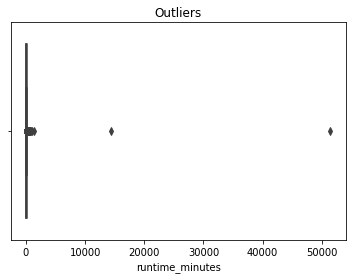

In [30]:
# lets see the outliers of runtime_minutes visually
sns.boxplot(data=joined_sql_tables, x='runtime_minutes').set(title='Outliers')

* the above outliers must be removed

### Removing outliers using their Z score

In [31]:
# importing stats from scipy
from scipy import stats

In [32]:
# computing the Z score for "runtime_minutes" column
joined_sql_tables['Z_score'] = stats.zscore(joined_sql_tables['runtime_minutes'])

In [33]:
# lets view the dataframe to see the Z scores
joined_sql_tables.describe()

,start_year,runtime_minutes,averagerating,numvotes,Z_score
count,73052.000000,73052.000000,73052.000000,7.305200e+04,7.305200e+04
mean,2014.281430,94.357677,6.330930,3.562173e+03,-1.945307e-17
std,2.615288,198.595006,1.474699,3.045804e+04,1.000007e+00
min,2010.000000,3.000000,1.000000,5.000000e+00,-4.600232e-01
25%,2012.000000,83.000000,5.500000,1.400000e+01,-5.719053e-02
50%,2014.000000,91.000000,6.500000,5.000000e+01,-1.690727e-02
75%,2017.000000,102.000000,7.400000,2.890000e+02,3.848221e-02
max,2019.000000,51420.000000,10.000000,1.841066e+06,2.584455e+02


* any row with a Z score of less than or equal to 3 is an outlier and has to be dropped

### filtering out the outliers

In [34]:
new_sql_df = joined_sql_tables.loc[joined_sql_tables['Z_score'].abs() <= 3]

In [35]:
# lets view the new dataframe
new_sql_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,Z_score
count,73044.000000,73044.000000,73044.000000,7.304400e+04,73044.000000
mean,2014.281406,93.391093,6.330779,3.562554e+03,-0.004867
std,2.615257,22.671732,1.474647,3.045968e+04,0.114161
min,2010.000000,3.000000,1.000000,5.000000e+00,-0.460023
25%,2012.000000,83.000000,5.500000,1.400000e+01,-0.057191
50%,2014.000000,91.000000,6.500000,5.000000e+01,-0.016907
75%,2017.000000,102.000000,7.400000,2.890000e+02,0.038482
max,2019.000000,607.000000,10.000000,1.841066e+06,2.581363


In [36]:
len(new_sql_df) # confirming that the rows have been dropped

73044

[Text(0.5, 1.0, 'extreme outliers removed')]

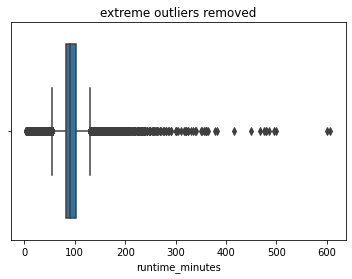

In [37]:
# lets see the removal of extreme outliers visually
sns.boxplot(data=new_sql_df, x='runtime_minutes').set(title='extreme outliers removed')

"""
    - Outliers are still present in the dataset but are considered true outliers.
    - They therefore will not be removed.
"""

# iv) Exploratory Data Analysis

* In this section, we start with the CSV file to find out the studio with the highest domestic and foreign gross. This will dictate the studios to partner with for film projects.
* Secondly, we explore the genres that receive high ratings. This is from the SQL dataset so as to give us a view of what type of films to produce.
* Lastly we explore the effect runtime_minutes(length of a movie) has on its rating.


## 1. CSV file

In [38]:
# overview of the dataset
#movies_gross_df = movies_gross_df.drop('year', axis=1)
movies_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [39]:
# lets see the studios domestic gross
movies_gross_df.sort_values(by=['domestic_gross'], ascending=False).head(5)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012


### grouping data so as to better manipulate it

In [40]:
# lets group the average domestic gross by studio
highest_average_gross = movies_gross_df.groupby(['studio']).mean().sort_values(by=['domestic_gross'], ascending=False).head(5)
highest_average_gross

,domestic_gross,foreign_gross,year
studio,,,
BV,1.768897e+08,2.480178e+08,2013.730769
P/DW,1.682900e+08,3.393600e+08,2010.900000
WB,9.325846e+07,1.435993e+08,2013.853846
WB (NL),9.034318e+07,1.440682e+08,2014.272727
Uni.,8.952804e+07,1.170470e+08,2014.090278


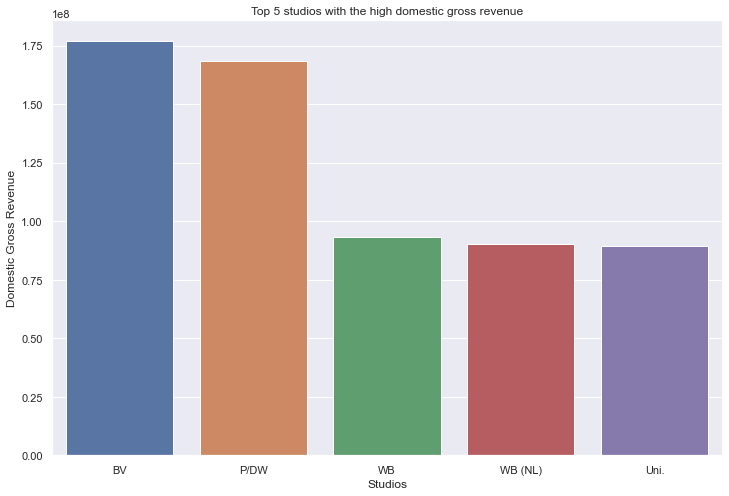

In [41]:
# lets plot out the highest average domestic gross

sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data=highest_average_gross, 
           x=highest_average_gross.index, 
           y='domestic_gross').set(title='Top 5 studios with the high domestic gross revenue',
                                  xlabel='Studios', ylabel='Domestic Gross Revenue');
plt.savefig("highest_domestic.png")

## graph interpretation

* The graph displays top studios based on their domestic gross revenue(local scene). 
* These studios would be best to partner with to create films.

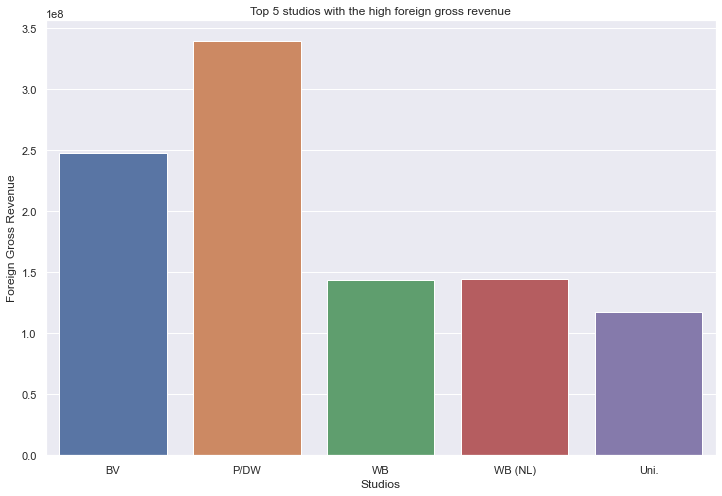

In [42]:
# lets plot out the highest average foreign gross
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data=highest_average_gross, 
           x=highest_average_gross.index, 
           y='foreign_gross').set(title='Top 5 studios with the high foreign gross revenue',
                                  xlabel='Studios', ylabel='Foreign Gross Revenue');
plt.savefig("highest_foreign.png")

## graph interpretation

* The graph displays top studios based on their domestic gross revenue(International scene). 
* These studios would be best to partner with to create films.
* In particular the 1st 2 are the best.

## 2. SQL database

In [43]:
new_sql_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Z_score
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,0.406067
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,0.098907
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,0.139190
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,-0.016907
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,-0.072297


### dropping unnecessary columns

In [44]:
relevant_columns_df = new_sql_df.drop(['movie_id', 'primary_title', 'original_title', 'start_year',
                                 'Z_score'], axis=1)
relevant_columns_df.head()

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
3,91.0,"Comedy,Drama",6.1,13
4,80.0,"Comedy,Drama,Fantasy",6.5,119


## Which genres have the highest ratings?

In [45]:
# lets group the columns by genres and sort by average rating
genres_group = relevant_columns_df.groupby(['genres']).mean().sort_values(by=['averagerating'], ascending=False).head(10)
genres_group

,runtime_minutes,averagerating,numvotes
genres,,,
"Comedy,Documentary,Fantasy",70.0,9.4,5.0
"Documentary,Family,Musical",59.0,9.3,19.0
"History,Sport",91.0,9.2,5.0
"Music,Mystery",91.0,9.0,5.0
Game-Show,130.0,9.0,7.0
"Drama,Fantasy,War",91.0,8.8,22.0
"Documentary,News,Sport",85.0,8.8,25.0
"Comedy,Drama,Reality-TV",91.0,8.8,15.0
"Drama,Short",18.0,8.8,8.0


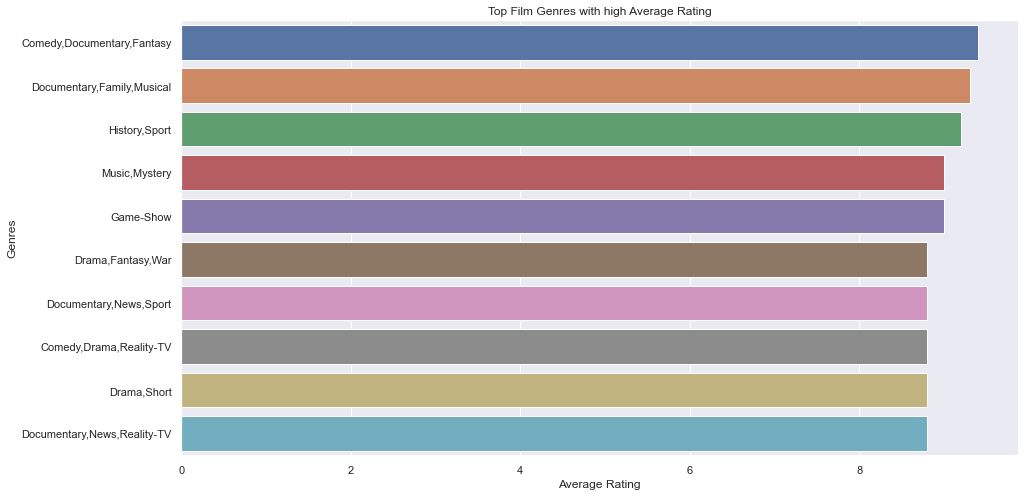

In [46]:
# lets plot out the genres with high rating
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data=genres_group, 
           x='averagerating', 
           y=genres_group.index,
           orient='h').set(title='Top Film Genres with high Average Rating',
                                  xlabel='Average Rating', ylabel='Genres');
plt.savefig("Popular genres")

## graph interpretation

* The graph shows the top 10 popular film genres based on their movie ratings.
* People seem to like comedies, fantasy, documentaries atc

### How does runtime (length of film) affect rating?

In [47]:
# for this we will check the correlation between runtime and average rating
correlation = relevant_columns_df['averagerating'].corr(relevant_columns_df['runtime_minutes'])
print('Correlation between average_rating and runtime_minutes is: {0}'.format(round(correlation, 2)))
print('The correlation is weak negative!')
print('This means their relationship is weak ergo one does not affect the other')

Correlation between average_rating and runtime_minutes is: -0.03
The correlation is weak negative!
This means their relationship is weak ergo one does not affect the other


### How does rating affect numvotes?

In [48]:
correlation = relevant_columns_df['averagerating'].corr(relevant_columns_df['numvotes'])
print('Correlation between average_rating and numvotes is: {0}'.format(round(correlation, 2)))
print('The correlation is weak positive!')
print('This means their relationship is weak ergo one does not affect the other')

Correlation between average_rating and numvotes is: 0.04
The correlation is weak positive!
This means their relationship is weak ergo one does not affect the other


## How does runtime affect numvotes

In [49]:
length_of_film = relevant_columns_df.groupby(['numvotes']).mean().sort_values(by=['numvotes'], ascending=False).head(10)
length_of_film

,runtime_minutes,averagerating
numvotes,,
1841066,148.0,8.8
1387769,164.0,8.4
1299334,169.0,8.6
1211405,165.0,8.4
1183655,143.0,8.1
1035358,180.0,8.2
1005960,138.0,8.1
948394,121.0,8.1
820847,108.0,8.0


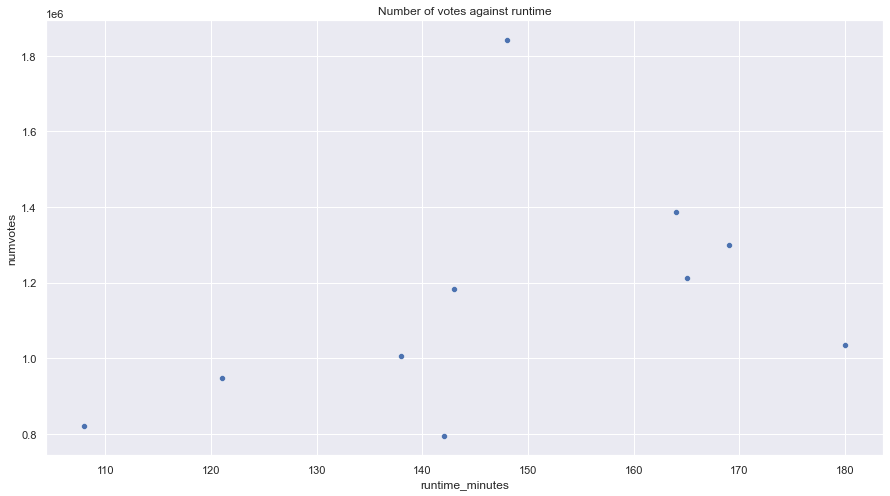

In [50]:
# scatter plot to show how runtime affects the number of votes.

sns.scatterplot(data=length_of_film, x='runtime_minutes', y=length_of_film.index).set(
title='Number of votes against runtime');
plt.savefig("runtime.png");

### graph interpretation

* from the graph it is clear that films with a runtime of 120 to 170 minutes received higher votes.

# v) Conclusions

Based on the analysis done, the following recommendations were made:
1. That Microsoft should produce films that are comedy, documentaries or fictional. The analysis ranked these genres as the most lucrative.
2. That Microsoft should partner with famous studios from the ones identified. The analysis gave the top 5 studios in terms of their domestic and foreign gross revenue.
3. That Microsoft should limit their average film runtime to between 120 and 170 minutes. Based on the analysis, films that had this runtime acquired more votes.

Limitations that were realized:
* That ratings are subjective. This means that the number of votes a film gets is directly propotional to someones taste therefore prediciting that a film will succeed is not feasible.

Next steps:
* Exploration of other datasets to improve domain knowledge for better discernment.